In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score

In [3]:
df=pd.read_csv("cleaned_titanic.csv")

In [4]:
df.head()

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,1,38.0,1,0,71.2833,False,False,False
2,2,1,3,26.0,0,0,7.9250,False,False,True
3,3,1,1,35.0,1,0,53.1000,False,False,True
4,4,0,3,35.0,0,0,8.0500,True,False,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  891 non-null    int64  
 1   Survived    891 non-null    int64  
 2   Pclass      891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Sex_male    891 non-null    bool   
 8   Embarked_Q  891 non-null    bool   
 9   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 51.5 KB


In [6]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [8]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
scaler=StandardScaler()

In [11]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [12]:
knn=KNeighborsClassifier(
    n_neighbors=2,#default
    metric='minkowski',
    p=2
)

In [13]:
knn.fit(X_train_scaled,y_train)

,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [14]:
y_pred=knn.predict(X_test_scaled)

In [15]:
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("\nConfusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("\nClassification Report: \n",classification_report(y_test,y_pred))

Accuracy:  0.8268156424581006

Confusion Matrix: 
 [[98  7]
 [24 50]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       105
           1       0.88      0.68      0.76        74

    accuracy                           0.83       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



In [16]:
accuracy_list=[]
for k in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    pred=knn.predict(X_test_scaled)
    accuracy_list.append(accuracy_score(y_test,pred))

best_k=accuracy_list.index(max(accuracy_list))+1
print("Best K value: ",best_k)

Best K value:  2


In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

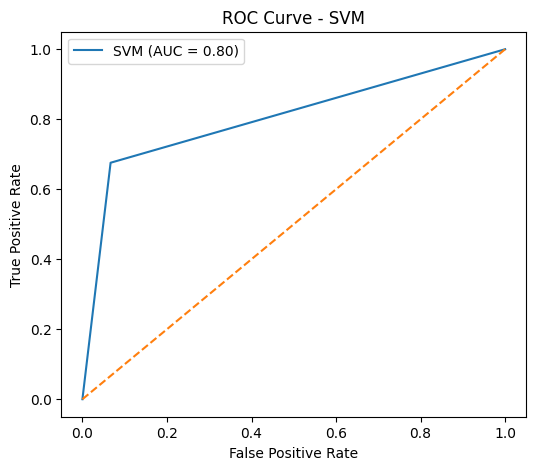

In [18]:
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"SVM (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()